In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import kurtosis, skew
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler, OrdinalEncoder, LabelEncoder

%matplotlib inline


In [2]:
df = pd.read_csv('./bank_test.csv')
# average yearly balance	- balance
# housing / loan - type of loans
#
# default - has credit in default
#
# day / month - last contact day / month
# campaign - number of times user contacted during this campaign
#
# pdays (number of days passed after last campaign contact - if -1 previously not contacted)
#
# previous - number of times contacted during previous campaign
# poutcome - previous marketing campaign outcome
#
# result (subscribed)  -  if duration is zerp == no

In [3]:
df.head(10)

,age,job,education,balance,loan,contact,subscribed
0,32.0,technician,tertiary,392,no,cellular,no
1,39.0,technician,secondary,688,yes,cellular,no
2,59.0,retired,secondary,1035,yes,cellular,no
3,47.0,blue-collar,secondary,398,yes,cellular,no
4,54.0,retired,secondary,1004,no,cellular,no
5,46.0,self-employed,tertiary,926,no,cellular,no
6,34.0,blue-collar,secondary,1924,yes,cellular,no
7,45.0,services,secondary,396,yes,cellular,no
8,58.0,management,tertiary,315,no,cellular,no
9,49.0,management,tertiary,20727,no,cellular,no


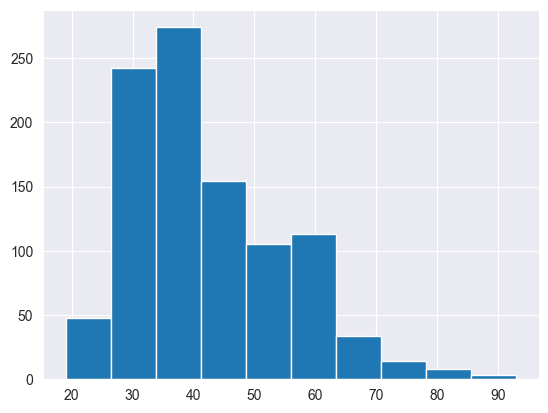

In [6]:
df = pd.DataFrame(df)

# Create a histogram for the 'age' column
plt.hist(df['age'], bins=10)
plt.show()


In [7]:

missing_values_count = df.isnull().sum()
missing_percentage = (missing_values_count / len(df)) * 100

missing_data_summary = pd.DataFrame({
    'Missing Count': missing_values_count,
    'Missing % Total': missing_percentage
})

missing_data_summary = missing_data_summary[missing_data_summary['Missing Count'] > 0]

print(missing_data_summary)

           Missing Count  Missing % Total
age                    5              0.5
job                    4              0.4
education             50              5.0
contact               14              1.4


In [11]:
value = df[df['balance'] > 20000]
print(value)


      age         job education  balance loan   contact subscribed
9    49.0  management  tertiary    20727   no  cellular         no
498  54.0  management  tertiary    26306   no  cellular         no
582  42.0  management  tertiary    27696   no  cellular        yes
792  45.0  management  tertiary    31472   no  cellular        yes
841  74.0     retired   primary    29080   no  cellular        yes
921  77.0     retired   primary    29340   no  cellular        yes


In [16]:
tertiary_count = df[df['education'] == 'tertiary'].shape[0]

total_count = df.shape[0]
print((tertiary_count / total_count) * 100 )


32.300000000000004


In [22]:
tertiary_count = df[df['job'] == 'services'].shape[0]

total_count = df.shape[0]
print((tertiary_count / total_count) * 100)

8.7


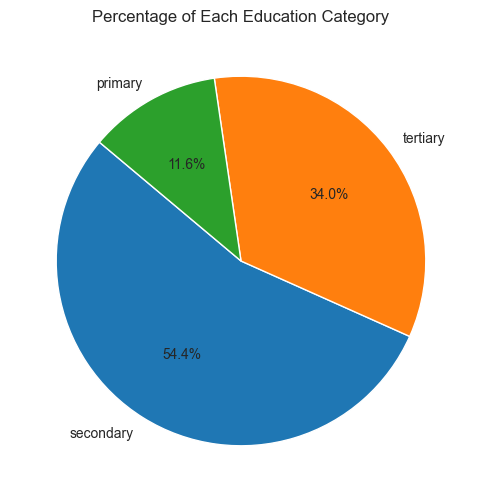

In [25]:


# Calculate the count of each education category
education_counts = df['education'].value_counts()

# Calculate the total count
total_count = df.shape[0]

# Calculate the percentage of each education category over the total count
education_percentages = (education_counts / total_count) * 100

# Visualize the percentages in a pie chart
plt.figure(figsize=(8, 6))
plt.pie(education_percentages, labels=education_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Each Education Category')
plt.show()




In [17]:
df.describe()

,age,balance
count,995.000000,1000.00000
mean,42.059296,1437.51300
std,12.555130,2815.60663
min,19.000000,-980.00000
25%,33.000000,226.75000
50%,39.000000,562.00000
75%,50.000000,1724.00000
max,93.000000,31472.00000


In [28]:
mean_value = df['balance'].mean()
print(mean_value)

1437.513


#